<b><h2>Lab Project Module 2:

<b><h3>Step 1: Import Required Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<b><h3>Step 2: Load the Dataset

In [57]:
df = pd.read_csv(r"E:\NUST DSAI COURSE\Datasets and Materials\AI-Data.csv")

<b><h3>Step 3: Inspect the Dataset

In [72]:
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get information about the dataset
print(df.describe())  # Summary statistics of numerical columns

   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0          20             

<b><h3>Step 4: Handle Missing Data

In [59]:
print(df.isnull().sum())  # Check for missing values

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


<b><h3>Step 5: Analyze Categorical Variables

M    305
F    175
Name: gender, dtype: int64


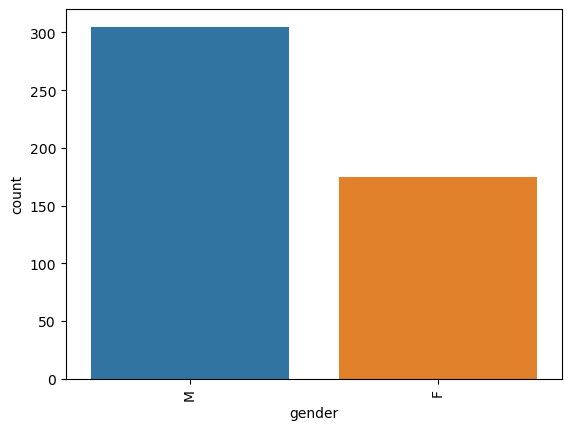

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64


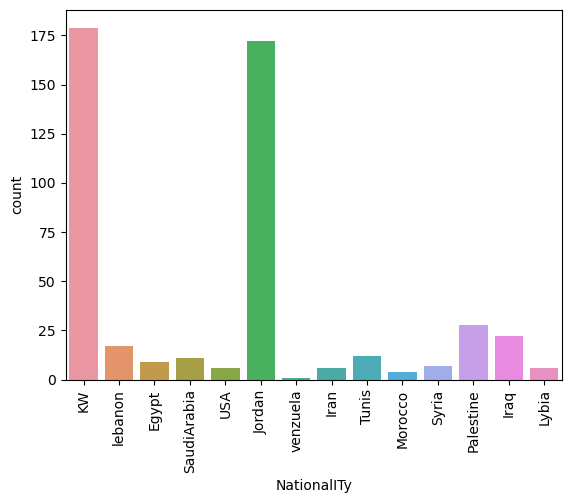

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64


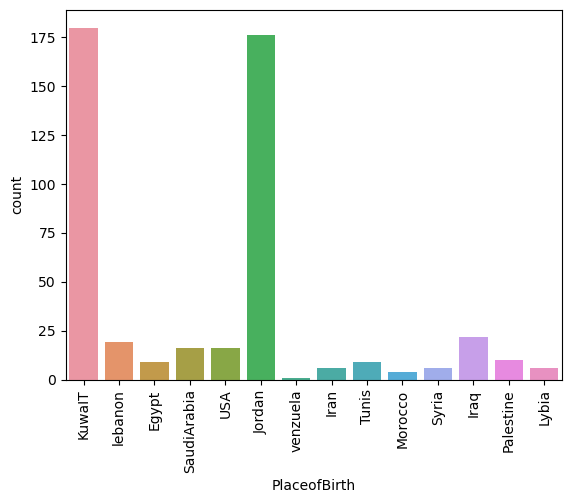

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64


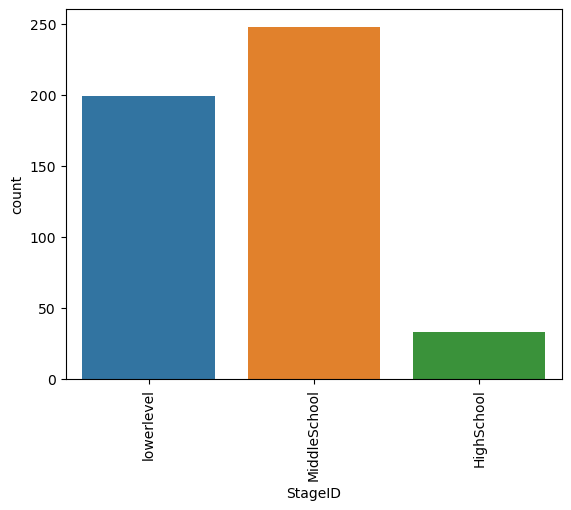

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64


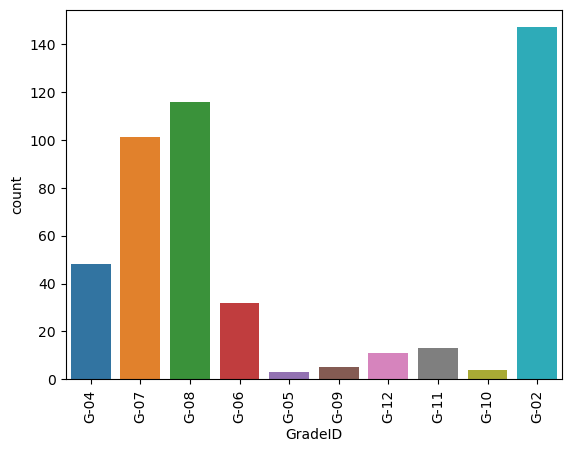

A    283
B    167
C     30
Name: SectionID, dtype: int64


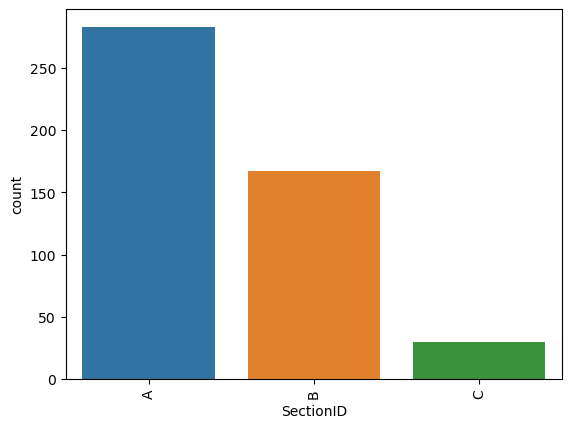

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64


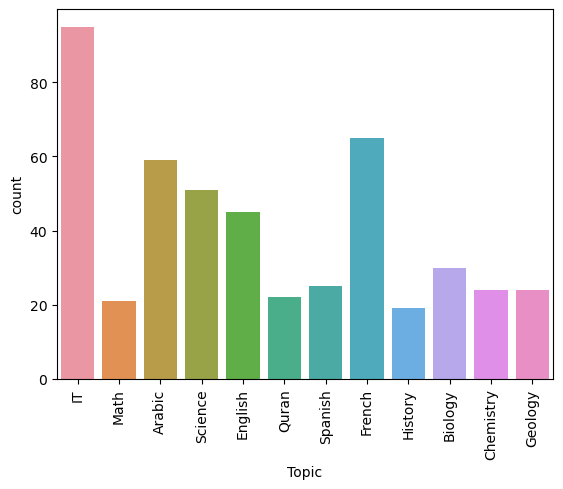

F    245
S    235
Name: Semester, dtype: int64


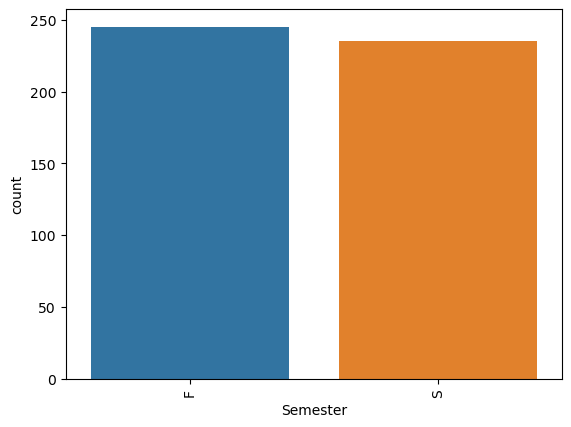

Father    283
Mum       197
Name: Relation, dtype: int64


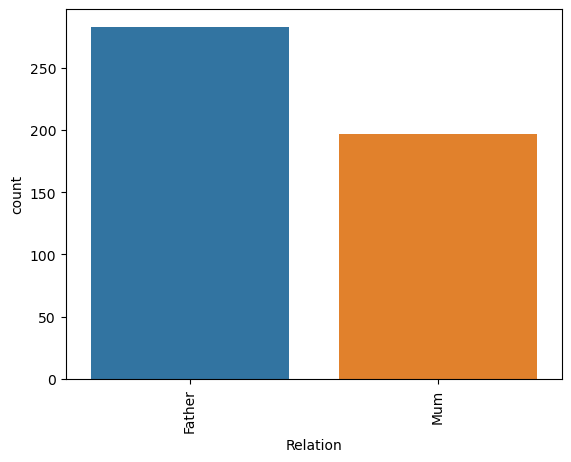

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64


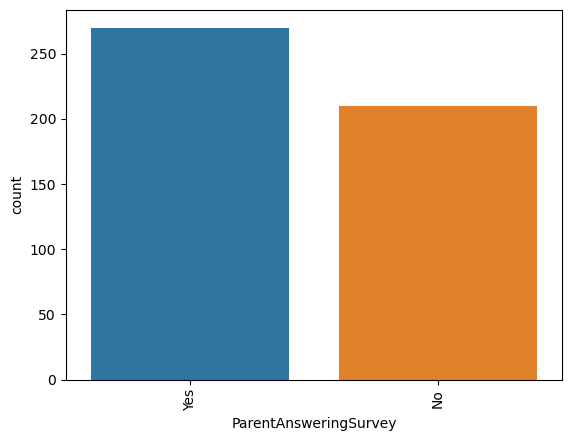

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64


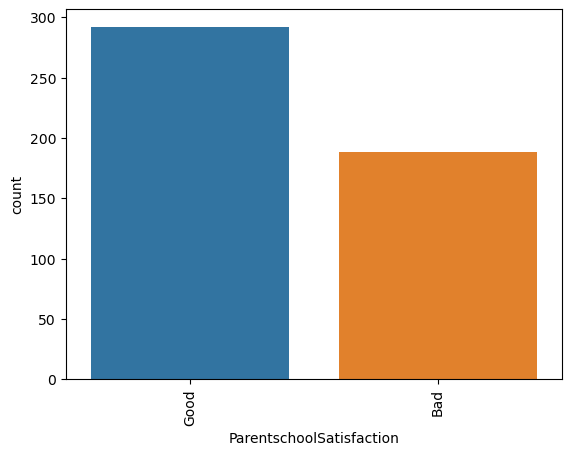

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64


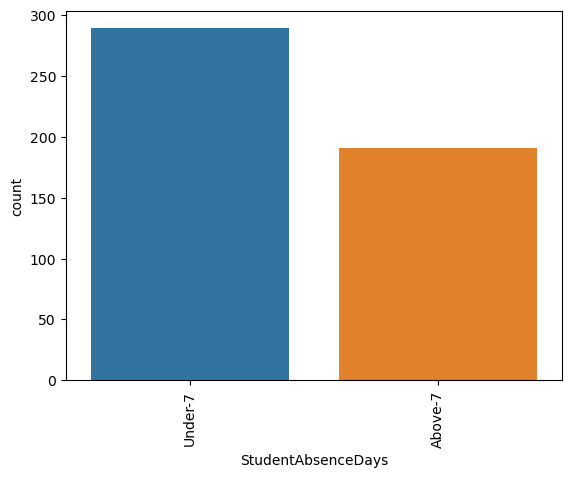

M    211
H    142
L    127
Name: Class, dtype: int64


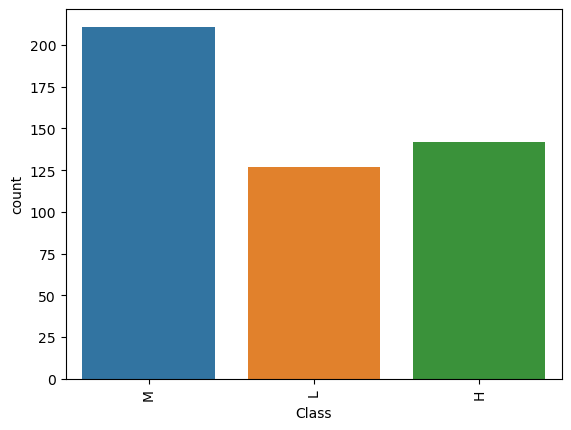

In [60]:
categorical_columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
for column in categorical_columns:
    print(df[column].value_counts())  # Count the frequency of each category
    sns.countplot(x=column, data=df)  # Visualize the distribution
    plt.xticks(rotation=90) # Rotate the x-axis label vertically
    plt.show()

Step 6: Analyze Numerical Variables

count    480.000000
mean      46.775000
std       30.779223
min        0.000000
25%       15.750000
50%       50.000000
75%       75.000000
max      100.000000
Name: raisedhands, dtype: float64


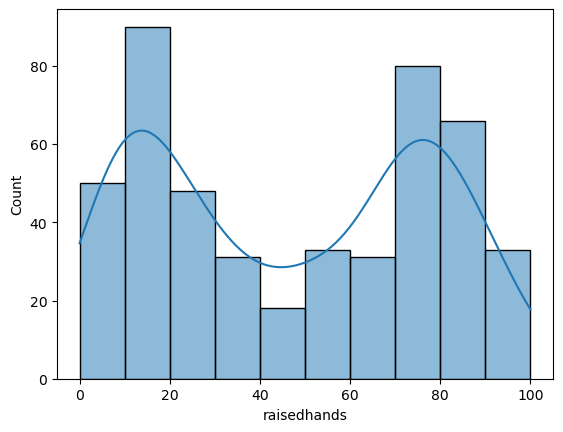

count    480.000000
mean      54.797917
std       33.080007
min        0.000000
25%       20.000000
50%       65.000000
75%       84.000000
max       99.000000
Name: VisITedResources, dtype: float64


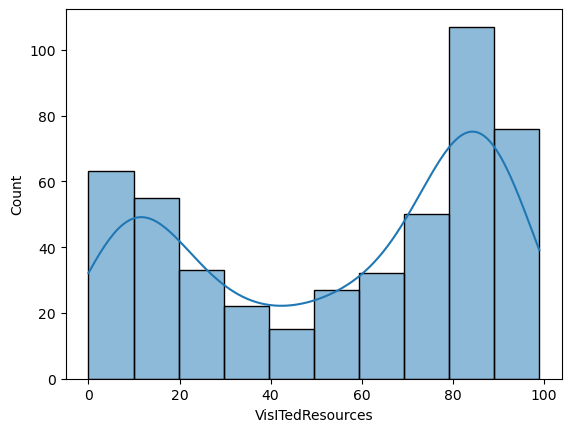

count    480.000000
mean      37.918750
std       26.611244
min        0.000000
25%       14.000000
50%       33.000000
75%       58.000000
max       98.000000
Name: AnnouncementsView, dtype: float64


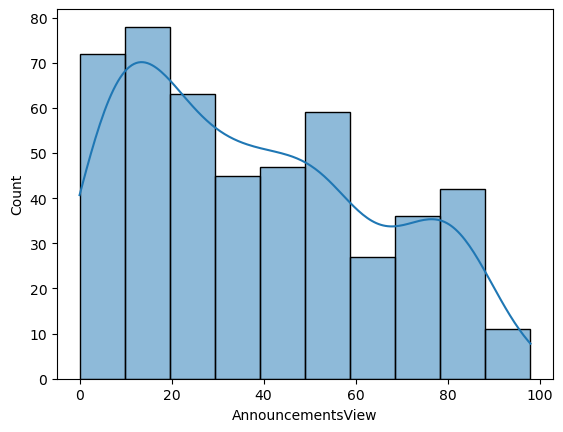

count    480.000000
mean      43.283333
std       27.637735
min        1.000000
25%       20.000000
50%       39.000000
75%       70.000000
max       99.000000
Name: Discussion, dtype: float64


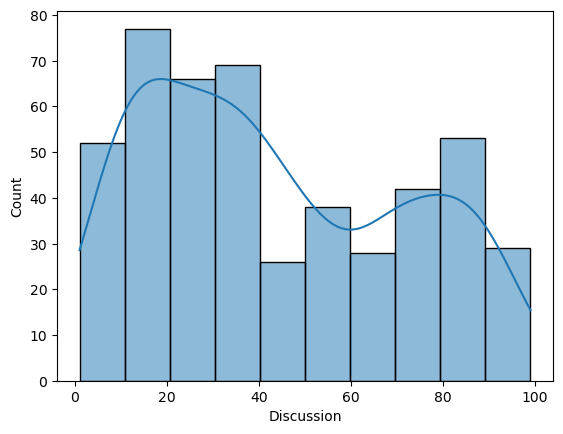

In [61]:
numerical_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
for column in numerical_columns:
    print(df[column].describe())  # Summary statistics of numerical columns
    sns.histplot(data=df, x=column, kde=True)  # Visualize the distribution
    plt.show()

<b><h3>Step 7: Explore Relationships

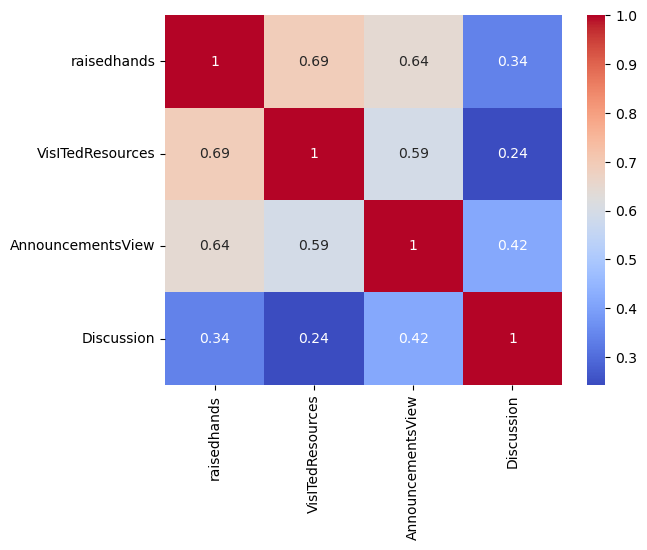

In [62]:
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Visualize correlation matrix
plt.show()

<b><h3>Step 8: Visualize the Data

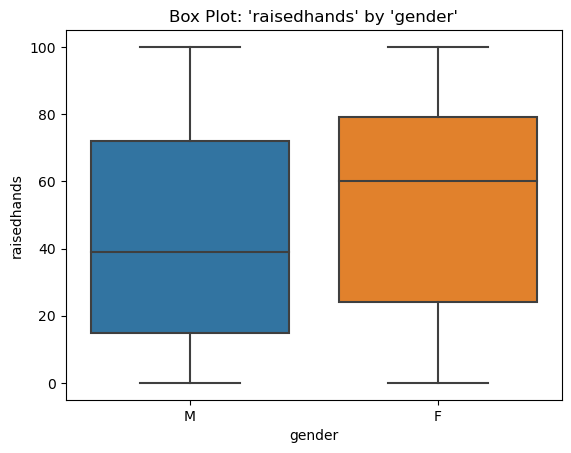

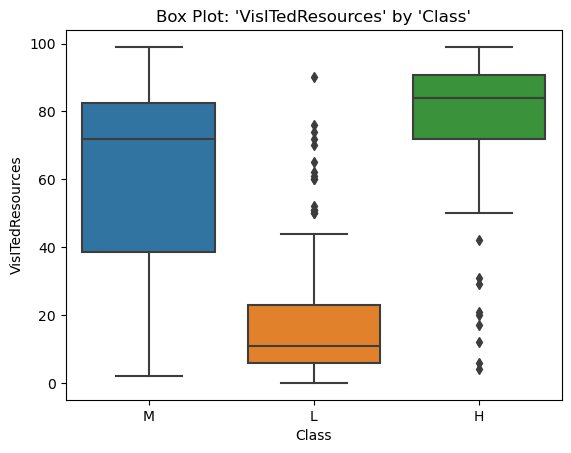

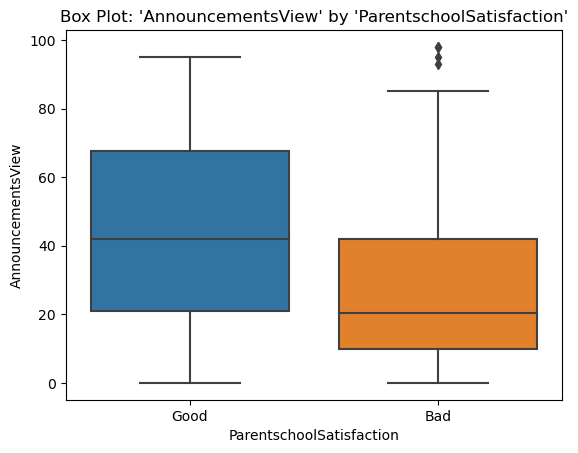

In [63]:
# We can create additional plots to gain insights into the data.
# For example, We can visualize relationships between variables, distributions, or trends.
# Here's an example:

# Box plot for 'raisedhands' by 'gender'
sns.boxplot(x='gender', y='raisedhands', data=df)
plt.title("Box Plot: 'raisedhands' by 'gender'")
plt.show()

# Box plot for 'VisITedResources' by 'Class'
sns.boxplot(x='Class', y='VisITedResources', data=df)
plt.title("Box Plot: 'VisITedResources' by 'Class'")
plt.show()

# Box plot for 'AnnouncementsView' by 'ParentschoolSatisfaction'
sns.boxplot(x='ParentschoolSatisfaction', y='AnnouncementsView', data=df)
plt.title("Box Plot: 'AnnouncementsView' by 'ParentschoolSatisfaction'")
plt.show()

<b><h3>Step 9: Identify Outliers

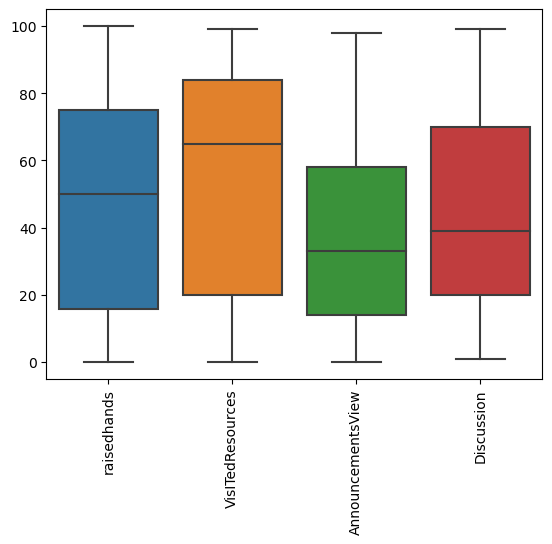

In [64]:
# We can perform outlier detection using statistical methods or visualization techniques.
# Here's an example using box plots:

sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)  # Box plots for numerical columns
plt.show()

<b><h3>Step 10: Draw Conclusions

In [69]:
# Based on the insights gained, draw conclusions about the dataset.
# This step is subjective and depends on the specific analysis we're conducting.
# Here's an example conclusion based on the previous steps:

# Example Conclusion:
# The dataset contains information about students, including their gender, nationality, place of birth,
# academic stage, grade, section, topic, semester, relation, and various performance metrics.
# The dataset has no missing values. The categorical variables show imbalanced distributions, with more
# females than males and certain nationalities being overrepresented.
# The numerical variables, such as the number of times students raised their hands, resources visited,
# announcements viewed, and discussions participated in, exhibit different distributions and ranges.
# There are some moderate positive correlations between the numerical variables, suggesting that students
# who participate more in discussions are also likely to raise their hands and access resources.
# Outliers are present in the numerical variables, indicating extreme values for some students.
# Further analysis and modeling can be done to explore the impact of different factors on student performance.

# Please adapt this conclusion to reflect the specific insights and analysis We derived from our dataset.

<b><h3>Label Encoding:

In [65]:
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print the updated dataset
print(df.head())

   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0          20             

<b><h3>Apply Regression Model

In [66]:
# Step 1: Split the Data
X = df.drop('Class', axis=1)
y = df['Class']

# Step 2: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and Train the Logistic Regression Model
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = logreg.predict(X_test)

# Step 5: Evaluate Model Performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68        22
           1       0.81      0.96      0.88        26
           2       0.80      0.77      0.79        48

    accuracy                           0.79        96
   macro avg       0.78      0.79      0.78        96
weighted avg       0.79      0.79      0.79        96



<b><h3>Now predition, score and report

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split the Data
X = df.drop('Class', axis=1)
y = df['Class']

# Step 2: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and Train the Logistic Regression Model
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = logreg.predict(X_test)

# Step 5: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Step 6: Print Results
print("Logistic Regression Prediction:")
print(y_pred)
print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", classification_report)

Logistic Regression Prediction:
[1 1 0 2 0 1 1 1 2 2 0 2 2 1 2 2 1 2 1 2 0 0 1 2 1 1 0 2 1 2 2 2 1 2 2 2 2
 1 2 0 2 2 1 2 0 1 0 2 2 2 2 2 1 2 2 2 1 0 2 1 2 1 1 0 2 2 1 0 1 0 1 0 2 2
 2 1 2 1 1 0 0 2 2 0 0 1 2 1 1 2 2 2 2 2 1 0]

Accuracy Score: 0.7916666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.68        22
           1       0.81      0.96      0.88        26
           2       0.80      0.77      0.79        48

    accuracy                           0.79        96
   macro avg       0.78      0.79      0.78        96
weighted avg       0.79      0.79      0.79        96

